In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import scipy.stats as stats
import seaborn as sns
import time


In [2]:
dow_jones_df= pd.read_csv('/Users/dianeshomefolder/Desktop/Dow Jones/dow_jones2.csv')
#dow_jones_df.set_index('timestamp')
dow_jones_df.head()


,timestamp,open,high,low,close,volume
0,2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000
1,2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000
2,2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000
3,2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000
4,2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000


In [3]:
# Create a new column ('close-minus-open') and perform the calculation
dow_jones_close = dow_jones_df
dow_jones_close['close-open'] = dow_jones_df['close'] - dow_jones_close['open']
dow_jones_close.head()


,timestamp,open,high,low,close,volume,close-open
0,2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098
1,2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903
2,2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000
3,2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008
4,2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410


In [4]:
# Added a column for Daily Percent Change, but didn't find it useful for now.
#dow_jones_close['daily percent change'] = dow_jones_close['close-open']/dow_jones_close['open']*100
#dow_jones_close.head()

# Check to see if the new column is a float vs. a string
#type(dow_jones_close['daily percent change'][1])

In [5]:
# This code changes the 'close-minus-open' column from a string to a float number
dow_jones_close['close-open'] = [float(x) for x in dow_jones_close['close-open']]
dow_jones_close.head()

,timestamp,open,high,low,close,volume,close-open
0,2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098
1,2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903
2,2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000
3,2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008
4,2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410


In [6]:
# Checked that close-open are now float numbers vs. string
#a = dow_jones_close['close-open'][0] - dow_jones_close['close-open'][1]
#print(a)

In [7]:
# Considered removing the dashes  and/or  trying to make the dates into integers. Decided not.
#dow_jones_close['timestamp'] = [x.replace('-', '') for x in dow_jones_close['timestamp']]
#dow_jones_close['timestamp'] = [int(x) for x in dow_jones_close['timestamp']]
#dow_jones_close.head()

In [8]:
# Remove the index column and let timestamp (which is year-month-day) be the index
dow_jones_close_no_index = dow_jones_close.set_index('timestamp')
dow_jones_close_no_index.head()


,open,high,low,close,volume,close-open
timestamp,,,,,,
2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098
2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903
2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000
2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008
2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410


In [9]:
# Add a column for the positive closing days
dow_jones_close_no_index['close-open +']=dow_jones_close_no_index['close-open'].where(dow_jones_close_no_index['close-open']>0)
dow_jones_close_no_index.head()


,open,high,low,close,volume,close-open,close-open +
timestamp,,,,,,,
2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098,NaN
2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903,NaN
2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000,104.000
2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008,NaN
2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410,98.541


In [10]:
# Add a column for the negative closing days
dow_jones_close_no_index['close-open -']=dow_jones_close_no_index['close-open'].where(dow_jones_close_no_index['close-open']<0)
dow_jones_close_no_index.head()


,open,high,low,close,volume,close-open,close-open +,close-open -
timestamp,,,,,,,,
2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098,NaN,-167.0098
2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903,NaN,-112.9903
2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000,104.000,NaN
2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008,NaN,-226.3008
2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410,98.541,NaN


In [11]:
# Calculate the mean of close-open + column and the standard error
dow_jones_positive_closes_mean = dow_jones_close_no_index.loc[:,'close-open +'].mean()
dow_jones_positive_closes_stderror = dow_jones_close_no_index.loc[:,'close-open +'].sem()
print('Dow Jones mean of positive close days:         ', '{0:.2f}'.format(dow_jones_positive_closes_mean))
print('Dow Jones standard error of positive close days:', '{0:.2f}'.format(dow_jones_positive_closes_stderror))

# Calculate the mean of close-open - column and the standard error
dow_jones_negative_closes_mean = dow_jones_close_no_index.loc[:,'close-open -'].mean()
dow_jones_negative_closes_stderror = dow_jones_close_no_index.loc[:,'close-open -'].sem()
print('Dow Jones mean of negative close days:        ', '{0:.2f}'.format(dow_jones_negative_closes_mean))
print('Dow Jones standard error of negative close days:', '{0:.2f}'.format(dow_jones_negative_closes_stderror))


Dow Jones mean of positive close days:          89.09
Dow Jones standard error of positive close days: 1.74
Dow Jones mean of negative close days:         -96.77
Dow Jones standard error of negative close days: 2.20


In [12]:
# Checked that close-open are now float numbers vs. string
#b = dow_jones_close['timestamp'][0] - dow_jones_close['timestamp'][1]
#print(b)

In [13]:
# Total number of days the market was up (+), down (-), or neutral from 1/3/2000-9/27/2019
negatives = len(dow_jones_close_no_index.loc[(dow_jones_close_no_index['close-open'] < 0)])    
positives = len(dow_jones_close_no_index.loc[(dow_jones_close_no_index['close-open'] > 0)])
neutrals =  len(dow_jones_close_no_index.loc[(dow_jones_close_no_index['close-open'] == 0)])

print('Dow Jones # of negative closes:', negatives) 
print('Dow Jones # positive closes:   ', positives)
print('Dow Jones # of neutral closes:    ', neutrals)


Dow Jones # of negative closes: 2312
Dow Jones # positive closes:    2651
Dow Jones # of neutral closes:     3


In [14]:
# Begin with all the election-to-inauguration dates (Trump, Obama 1, Bush 1, Obama 2, Bush 2)

In [15]:
# Create a database for dates between Trump's election (11/8/2016) 
# and his inauguration (1/20/2017)    where ea stands for election to inauguration
trump_ea_df = dow_jones_close_no_index[676:726]
trump_ea_df.head()


,open,high,low,close,volume,close-open,close-open +,close-open -
timestamp,,,,,,,,
2017-01-20,19795.0605,19843.9395,19759.1406,19827.2500,435260000,32.1895,32.1895,NaN
2017-01-19,19813.5508,19824.1406,19677.9395,19732.4004,301750000,-81.1504,NaN,-81.1504
2017-01-18,19822.7305,19828.1992,19739.0000,19804.7207,279760000,-18.0098,NaN,-18.0098
2017-01-17,19848.8203,19882.9902,19775.3496,19826.7695,341900000,-22.0508,NaN,-22.0508
2017-01-13,19912.5391,19952.0293,19849.3809,19885.7305,263780000,-26.8086,NaN,-26.8086


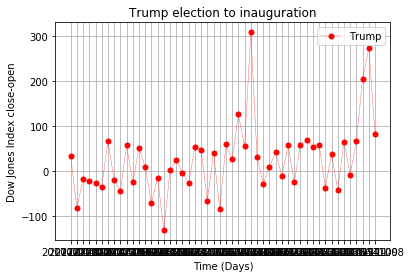

In [16]:
# Generate the Plot (Accounting for percentages)
# set limit of x (all drug data ends at 45 days)
#x_lower = survival_rates_percent['Timepoint'[0]]
#x_upper = survival_rates_percent['Timepoint'[-1]]
#plt.xticks(x_lower, x_upper, 10)

# plot several lines on the same axis, indicated here and on each line as ax=ax
ax = plt.gca()

# Plot 4 drugs plus placebo for survival rates (percentage) over days (Timepoint)
plt.plot(trump_ea_df["close-open"], "red", linestyle="dashed", marker = 'o', markersize=5, linewidth=0.40)
#plt.plot("blue", linestyle="dashed", marker='^', markersize=5, linewidth=0.40)
#plt.plot("green", linestyle="dashed", marker='s', markersize=5, linewidth=0.40)
#plt.plot("brown", linestyle="dashed", marker='x', markersize=5, linewidth=0.40)
#plt.plot("black", linestyle="dashed", marker='d', markersize=5, linewidth=0.40)

# Create a title, x label, and y label for our chart
plt.title("Trump election to inauguration")
plt.xlabel("Time (Days)")
plt.ylabel("Dow Jones Index close-open")

# Set a grid on the plot
ax.xaxis.grid()
ax.yaxis.grid()

# Add the legend
plt.legend(['Trump'], loc='best')
# Show the Figure


In [17]:
# Calculate the number of days the market was up (+), down (-), or neutral 
trump_ea_negatives = len(trump_ea_df.loc[(trump_ea_df['close-open'] < 0)])    
trump_ea_positives = len(trump_ea_df.loc[(trump_ea_df['close-open'] > 0)])
trump_ea_neutrals =  len(trump_ea_df.loc[(trump_ea_df['close-open'] == 0)])

print('Trump ea negatives', trump_ea_negatives) 
print('Trump ea positives', trump_ea_positives)
print('Trump ea neutrals ', trump_ea_neutrals)


Trump ea negatives 21
Trump ea positives 29
Trump ea neutrals  0


In [18]:
# For Trump: Calculate the mean of close-open + column and the standard error (election to inauguration)
trump_ea_positive_closes_mean = trump_ea_df.loc[:,'close-open +'].mean()
trump_ea_positive_closes_stderror = trump_ea_df.loc[:,'close-open +'].sem()
print('Trump mean of positive close days:          ', '{0:.2f}'.format(trump_ea_positive_closes_mean))
print('Trump standard error of positive close days:', '{0:.2f}'.format(trump_ea_positive_closes_stderror))

# For Trump: Calculate the mean of close-open - column and the standard error (election to inauguration)
trump_ea_negative_closes_mean = trump_ea_df.loc[:,'close-open -'].mean()
trump_ea_negative_closes_stderror = trump_ea_df.loc[:,'close-open -'].sem()
print('Trump mean of negative close days:         ', '{0:.2f}'.format(trump_ea_negative_closes_mean))
print('Trump standard error of negative close days: ', '{0:.2f}'.format(trump_ea_negative_closes_stderror))


Trump mean of positive close days:           71.14
Trump standard error of positive close days: 13.26
Trump mean of negative close days:          -39.14
Trump standard error of negative close days:  6.77


In [19]:
# Create a database for dates between Obama's first term election date (11/4/2008) 
# and his first term inauguration (1/20/2009)  where ea stands for election to inauguration
obama_ea1_df = dow_jones_close_no_index[2691:2743]
obama_ea1_df.head()

,open,high,low,close,volume,close-open,close-open +,close-open -
timestamp,,,,,,,,
2009-01-20,8279.6299,8291.9805,7939.9302,7949.0898,419200000,-330.5401,NaN,-330.5401
2009-01-16,8215.6699,8341.2002,8109.3398,8281.2197,439360000,65.5498,65.5498,NaN
2009-01-15,8196.2402,8286.1602,7995.1299,8212.4902,436660000,16.2500,16.2500,NaN
2009-01-14,8446.0098,8446.2500,8140.7202,8200.1396,355050000,-245.8702,NaN,-245.8702
2009-01-13,8474.6104,8522.0801,8376.8799,8448.5596,304050000,-26.0508,NaN,-26.0508


In [20]:
# Find the number of days the market was up (+), down (-), or neutral for Obama ea 1st term
obama_ea1_negatives = len(obama_ea1_df.loc[(obama_ea1_df['close-open'] < 0)])    
obama_ea1_positives = len(obama_ea1_df.loc[(obama_ea1_df['close-open'] > 0)])
obama_ea1_neutrals =  len(obama_ea1_df.loc[(obama_ea1_df['close-open'] == 0)])

print('Obama ea1 negatives', obama_ea1_negatives) 
print('Obama ea1 positives', obama_ea1_positives)
print('Obama ea1 neutrals ', obama_ea1_neutrals)

Obama ea1 negatives 28
Obama ea1 positives 24
Obama ea1 neutrals  0


In [21]:
# For Obama's first election: Calculate the mean of close-open + column and the standard error
obama_ea1_positive_closes_mean = obama_ea1_df.loc[:,'close-open +'].mean()
obama_ea1_positive_closes_stderror = obama_ea1_df.loc[:,'close-open +'].sem()
print('Obama ea1 mean of positive close days:          ', '{0:.2f}'.format(obama_ea1_positive_closes_mean))
print('Obama ea1 standard error of positive close days: ', '{0:.2f}'.format(obama_ea1_positive_closes_stderror))

# For Obama's first election: Calculate the mean of close-open - column and the standard error
obama_ea1_negative_closes_mean = obama_ea1_df.loc[:,'close-open -'].mean()
obama_ea1_negative_closes_stderror = obama_ea1_df.loc[:,'close-open -'].sem()
print('Obama ea1 mean of negative close days:         ', '{0:.2f}'.format(obama_ea1_negative_closes_mean))
print('Obama ea1 standard error of negative close days: ', '{0:.2f}'.format(obama_ea1_negative_closes_stderror))


Obama ea1 mean of positive close days:           201.50
Obama ea1 standard error of positive close days:  30.46
Obama ea1 mean of negative close days:          -217.23
Obama ea1 standard error of negative close days:  31.74


In [22]:
# Create a database for dates between Bush's first term election (11/7/2000) 
# and his first term inauguration (1/20/2001)    where ea stands for election to inauguration
# January 20, 2001 was a Saturday (stock market closed) so data is through 1/19/2001
bush_ea1_df = dow_jones_close_no_index[4701:4751]
bush_ea1_df.head()

,open,high,low,close,volume,close-open,close-open +,close-open -
timestamp,,,,,,,,
2001-01-19,10686.0000,10717.7197,10564.0098,10587.5898,363100000,-98.4102,NaN,-98.4102
2001-01-18,10584.5703,10737.2402,10567.4697,10678.2803,307320000,93.7100,93.7100,NaN
2001-01-17,10660.9502,10705.9297,10545.2998,10584.3398,304800000,-76.6104,NaN,-76.6104
2001-01-16,10525.7803,10664.0498,10486.6396,10652.6602,233330000,126.8799,126.8799,NaN
2001-01-12,10608.7402,10623.8896,10468.0400,10525.3799,247020000,-83.3603,NaN,-83.3603


In [23]:
# Find the number of days the market was up (+), down (-), or neutral for Bush ea 1st term
bush_ea1_negatives = len(bush_ea1_df.loc[(bush_ea1_df['close-open'] < 0)])    
bush_ea1_positives = len(bush_ea1_df.loc[(bush_ea1_df['close-open'] > 0)])
bush_ea1_neutrals =  len(bush_ea1_df.loc[(bush_ea1_df['close-open'] == 0)])
print('Bush ea1 negatives', bush_ea1_negatives) 
print('Bush ea1 positives', bush_ea1_positives)
print('Bush ea1 neutrals ', bush_ea1_neutrals)

Bush ea1 negatives 27
Bush ea1 positives 23
Bush ea1 neutrals  0


In [24]:
# For Bush's first election: Calculate the mean of close-open + column and the standard error
bush_ea1_positive_closes_mean = bush_ea1_df.loc[:,'close-open +'].mean()
bush_ea1_positive_closes_stderror = bush_ea1_df.loc[:,'close-open +'].sem()
print('Bush ea1 mean of positive close days:          ', '{0:.2f}'.format(bush_ea1_positive_closes_mean))
print('Bush ea1 standard error of positive close days: ', '{0:.2f}'.format(bush_ea1_positive_closes_stderror))

# For Bush's first election: Calculate the mean of close-open - column and the standard error
bush_ea1_negative_closes_mean = bush_ea1_df.loc[:,'close-open -'].mean()
bush_ea1_negative_closes_stderror = bush_ea1_df.loc[:,'close-open -'].sem()
print('Bush ea1 mean of negative close days:         ', '{0:.2f}'.format(bush_ea1_negative_closes_mean))
print('Bush ea1 standard error of negative close days: ', '{0:.2f}'.format(bush_ea1_negative_closes_stderror))


Bush ea1 mean of positive close days:           106.94
Bush ea1 standard error of positive close days:  18.31
Bush ea1 mean of negative close days:          -103.45
Bush ea1 standard error of negative close days:  14.68


In [25]:
# Create a database for dates between Obama's second term election date (11/6/2012) 
# and his second term inauguration (1/20/2013)  where ea stands for election to inauguration
# January 20, 2013 was a Sunday (stock market closed) so data is through Friday 1/18/2013 
obama_ea2_df = dow_jones_close_no_index[1684:1735]
obama_ea2_df.head()

,open,high,low,close,volume,close-open,close-open +,close-open -
timestamp,,,,,,,,
2013-01-18,13596.0195,13649.9297,13571.8604,13649.7002,260900000,53.6807,53.6807,NaN
2013-01-17,13511.2305,13633.8896,13510.2402,13596.0195,183900000,84.7890,84.7890,NaN
2013-01-16,13534.8896,13534.8896,13468.9600,13511.2305,118540000,-23.6591,NaN,-23.6591
2013-01-15,13507.3203,13546.3701,13445.7998,13534.8896,102280000,27.5693,27.5693,NaN
2013-01-14,13488.4297,13520.1797,13459.8398,13507.3203,118460000,18.8906,18.8906,NaN


In [26]:
# Find the number of days the market was up (+), down (-), or neutral for Obama 2nd ea
obama_ea2_negatives = len(obama_ea2_df.loc[(obama_ea2_df['close-open'] < 0)])    
obama_ea2_positives = len(obama_ea2_df.loc[(obama_ea2_df['close-open'] > 0)])
obama_ea2_neutrals =  len(obama_ea2_df.loc[(obama_ea2_df['close-open'] == 0)])
print('Obama ea2 negatives', obama_ea2_negatives) 
print('Obama ea2 positives', obama_ea2_positives)
print('Obama ea2 neutrals ', obama_ea2_neutrals)

Obama ea2 negatives 24
Obama ea2 positives 27
Obama ea2 neutrals  0


In [27]:
# For Obama's first election: Calculate the mean of close-open + column and the standard error
obama_ea2_positive_closes_mean = obama_ea2_df.loc[:,'close-open +'].mean()
obama_ea2_positive_closes_stderror = obama_ea2_df.loc[:,'close-open +'].sem()
print('Obama ea2 mean of positive close days:           ', '{0:.2f}'.format(obama_ea2_positive_closes_mean))
print('Obama ea2 standard error of positive close days: ', '{0:.2f}'.format(obama_ea2_positive_closes_stderror))

# For Trump: Calculate the mean of close-open - column and the standard error
obama_ea2_negative_closes_mean = obama_ea2_df.loc[:,'close-open -'].mean()
obama_ea2_negative_closes_stderror = obama_ea2_df.loc[:,'close-open -'].sem()
print('Obama ea2 mean of negative close days:          ', '{0:.2f}'.format(obama_ea2_negative_closes_mean))
print('Obama ea2 standard error of negative close days: ', '{0:.2f}'.format(obama_ea2_negative_closes_stderror))


Obama ea2 mean of positive close days:            82.22
Obama ea2 standard error of positive close days:  13.24
Obama ea2 mean of negative close days:           -66.93
Obama ea2 standard error of negative close days:  13.90


In [28]:
# Create a database for dates between Bush's re-election (11/2/2004) 
# and his second inauguration (1/20/2005)    where ea stands for election to inauguration
bush_ea2_df = dow_jones_close_no_index[3697:3752]
bush_ea2_df.head()

,open,high,low,close,volume,close-open,close-open +,close-open -
timestamp,,,,,,,,
2005-01-20,10538.9004,10546.7695,10457.9404,10471.4697,242810000,-67.4307,NaN,-67.4307
2005-01-19,10626.0498,10626.2803,10536.4902,10539.9697,242250000,-86.0801,NaN,-86.0801
2005-01-18,10554.2305,10628.9404,10500.5801,10628.7900,267680000,74.5595,74.5595,NaN
2005-01-14,10506.7100,10567.0098,10503.7598,10558.0000,223070000,51.2900,51.2900,NaN
2005-01-13,10617.4102,10618.1504,10485.7305,10505.8301,271180000,-111.5801,NaN,-111.5801


In [29]:
# Find the number of days the market was up (+), down (-), or neutral for Bush ea 1st term
bush_ea2_negatives = len(bush_ea2_df.loc[(bush_ea2_df['close-open'] < 0)])    
bush_ea2_positives = len(bush_ea2_df.loc[(bush_ea2_df['close-open'] > 0)])
bush_ea2_neutrals =  len(bush_ea2_df.loc[(bush_ea2_df['close-open'] == 0)])
print('Bush ea2 negatives', bush_ea2_negatives) 
print('Bush ea2 positives', bush_ea2_positives)
print('Bush ea2 neutrals ', bush_ea2_neutrals)

Bush ea2 negatives 24
Bush ea2 positives 31
Bush ea2 neutrals  0


In [30]:
# For Bush's second election: Calculate the mean of close-open + column and the standard error
bush_ea2_positive_closes_mean = bush_ea2_df.loc[:,'close-open +'].mean()
bush_ea2_positive_closes_stderror = bush_ea2_df.loc[:,'close-open +'].sem()
print('Bush ea2 mean of positive close days:          ', '{0:.2f}'.format(bush_ea2_positive_closes_mean))
print('Bush ea2 standard error of positive close days: ', '{0:.2f}'.format(bush_ea2_positive_closes_stderror))

# For Bush's second election: Calculate the mean of close-open - column and the standard error
bush_ea2_negative_closes_mean = bush_ea2_df.loc[:,'close-open -'].mean()
bush_ea2_negative_closes_stderror = bush_ea2_df.loc[:,'close-open -'].sem()
print('Bush ea2 mean of negative close days:         ', '{0:.2f}'.format(bush_ea2_negative_closes_mean))
print('Bush ea2 standard error of negative close days: ', '{0:.2f}'.format(bush_ea2_negative_closes_stderror))


Bush ea2 mean of positive close days:           52.21
Bush ea2 standard error of positive close days:  8.00
Bush ea2 mean of negative close days:          -48.69
Bush ea2 standard error of negative close days:  7.09


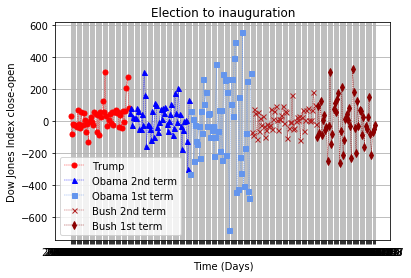

In [65]:
# Generate the Plot (Accounting for percentages)
# set limit of x (all drug data ends at 45 days)
#x_lower = survival_rates_percent['Timepoint'[0]]
#x_upper = survival_rates_percent['Timepoint'[-1]]

#plt.xticks(2000, 2020, 100)

# plot several lines on the same axis, indicated here and on each line as ax=ax
ax = plt.gca()

# Plot 4 drugs plus placebo for survival rates (percentage) over days (Timepoint)
plt.plot(trump_ea_df["close-open"], "red", linestyle="dashed", marker = 'o', markersize=5, linewidth=0.40)
plt.plot(obama_ea2_df["close-open"], "blue", linestyle="dashed", marker='^', markersize=5, linewidth=0.40)
plt.plot(obama_ea1_df["close-open"], "cornflowerblue", linestyle="dashed", marker='s', markersize=5, linewidth=0.40)
plt.plot(bush_ea2_df["close-open"], "firebrick", linestyle="dashed", marker='x', markersize=5, linewidth=0.40)
plt.plot(bush_ea1_df["close-open"], "darkred", linestyle="dashed", marker='d', markersize=5, linewidth=0.40)
#plt.plot("green", linestyle="dashed", marker='s', markersize=5, linewidth=0.40)
#plt.plot("brown", linestyle="dashed", marker='x', markersize=5, linewidth=0.40)
#plt.plot("black", linestyle="dashed", marker='d', markersize=5, linewidth=0.40)

# Create a title, x label, and y label for our chart
plt.title("Election to inauguration")
plt.xlabel("Time (Days)")
plt.ylabel("Dow Jones Index close-open")

# Set a grid on the plot
ax.xaxis.grid()
ax.yaxis.grid()

# Add the legend
plt.legend(['Trump', 'Obama 2nd term', 'Obama 1st term', 'Bush 2nd term', 'Bush 1st term'], loc='best')
# Show the Figure

In [32]:
# Next find the data for inauguration-day-to-inauguration-day (President's actual term)
# In Trump's case, inauguration day to latest data collection date (9/27/2019)

In [33]:
# Create a database for dates between Trump's term to date, in other words
# his inauguration (1/20/2017) to data collection endpoint (9/27/2018)
trump_term_df = dow_jones_close_no_index[0:677]
trump_term_df.head()

,open,high,low,close,volume,close-open,close-open +,close-open -
timestamp,,,,,,,,
2019-09-27,26987.2598,27012.5391,26715.8203,26820.2500,217780000,-167.0098,NaN,-167.0098
2019-09-26,27004.1094,27015.0703,26803.8398,26891.1191,229180000,-112.9903,NaN,-112.9903
2019-09-25,26866.7109,27016.5605,26755.8594,26970.7109,237220000,104.0000,104.000,NaN
2019-09-24,27034.0703,27079.6797,26704.9609,26807.7695,301750000,-226.3008,NaN,-226.3008
2019-09-23,26851.4492,27011.0703,26831.3398,26949.9902,204240000,98.5410,98.541,NaN


In [34]:
# Find the number of days the market was up (+), down (-), or neutral during Trump's term
trump_term_negatives = len(trump_term_df.loc[(trump_term_df['close-open'] < 0)])    
trump_term_positives = len(trump_term_df.loc[(trump_term_df['close-open'] > 0)])
trump_term_neutrals =  len(trump_term_df.loc[(trump_term_df['close-open'] == 0)])
trump_close_minus_open_total = trump_term_df['close-open'].sum()


print('Trump term negatives', trump_term_negatives) 
print('Trump term positives', trump_term_positives)
print('Trump term neutrals ', trump_term_neutrals)
print('Trump term sum of all close-open', '{0:.2f}'.format(trump_close_minus_open_total))


Trump term negatives 299
Trump term positives 378
Trump term neutrals  0
Trump term sum of all close-open 1707.51


In [35]:
# For Trump's term: Calculate the mean of close-open + column and the standard error (election to inauguration)
trump_term_positive_closes_mean = trump_term_df.loc[:,'close-open +'].mean()
trump_term_positive_closes_stderror = trump_term_df.loc[:,'close-open +'].sem()
print('Trump term mean of positive close days:          ', '{0:.2f}'.format(trump_term_positive_closes_mean))
print('Trump term standard error of positive close days:  ', '{0:.2f}'.format(trump_term_positive_closes_stderror))

# For Trump's term: Calculate the mean of close-open - column and the standard error (election to inauguration)
trump_term_negative_closes_mean = trump_term_df.loc[:,'close-open -'].mean()
trump_term_negative_closes_stderror = trump_term_df.loc[:,'close-open -'].sem()
print('Trump term mean of negative close days:         ', '{0:.2f}'.format(trump_term_negative_closes_mean))
print('Trump term standard error of negative close days:  ', '{0:.2f}'.format(trump_term_negative_closes_stderror))


Trump term mean of positive close days:           105.96
Trump term standard error of positive close days:   5.97
Trump term mean of negative close days:          -128.24
Trump term standard error of negative close days:   9.35


In [36]:
# Create a database for dates of Obama's first term from first inauguration (1/20/2009)
# to end of first term (1/19/2013) (Jan. 19th was a Saturday, market end Fr. 1/18/13)
obama_term1_df = dow_jones_close_no_index[1684:2692]
obama_term1_df.head()

,open,high,low,close,volume,close-open,close-open +,close-open -
timestamp,,,,,,,,
2013-01-18,13596.0195,13649.9297,13571.8604,13649.7002,260900000,53.6807,53.6807,NaN
2013-01-17,13511.2305,13633.8896,13510.2402,13596.0195,183900000,84.7890,84.7890,NaN
2013-01-16,13534.8896,13534.8896,13468.9600,13511.2305,118540000,-23.6591,NaN,-23.6591
2013-01-15,13507.3203,13546.3701,13445.7998,13534.8896,102280000,27.5693,27.5693,NaN
2013-01-14,13488.4297,13520.1797,13459.8398,13507.3203,118460000,18.8906,18.8906,NaN


In [37]:
# Find the number of days the market was up (+), down (-), or neutral for Obama's 1st term
obama_term1_negatives = len(obama_term1_df.loc[(obama_term1_df['close-open'] < 0)])    
obama_term1_positives = len(obama_term1_df.loc[(obama_term1_df['close-open'] > 0)])
obama_term1_neutrals =  len(obama_term1_df.loc[(obama_term1_df['close-open'] == 0)])
obama1_close_minus_open_total = obama_term1_df['close-open'].sum()

print('Obama term 1 negatives', obama_term1_negatives) 
print('Obama term 1 positives', obama_term1_positives)
print('Obama term 1 neutrals ', obama_term1_neutrals)
print('Obama term 1 sum of all close-open', '{0:.2f}'.format(obama1_close_minus_open_total))


Obama term 1 negatives 456
Obama term 1 positives 551
Obama term 1 neutrals  1
Obama term 1 sum of all close-open 6597.03


In [38]:
# For Obama's first term: Calculate the mean of close-open + column and the standard error
obama_term1_positive_closes_mean = obama_term1_df.loc[:,'close-open +'].mean()
obama_term1_positive_closes_stderror = obama_term1_df.loc[:,'close-open +'].sem()
print('Obama term 1 mean of positive close days:          ', '{0:.2f}'.format(obama_term1_positive_closes_mean))
print('Obama term 1 standard error of positive close days: ', '{0:.2f}'.format(obama_term1_positive_closes_stderror))

# For Obama's first term: Calculate the mean of close-open - column and the standard error
obama_term1_negative_closes_mean = obama_term1_df.loc[:,'close-open -'].mean()
obama_term1_negative_closes_stderror = obama_term1_df.loc[:,'close-open -'].sem()
print('Obama term 1 mean of negative close days:         ', '{0:.2f}'.format(obama_term1_negative_closes_mean))
print('Obama term 1 standard error of negative close days: ', '{0:.2f}'.format(obama_term1_negative_closes_stderror))


Obama term 1 mean of positive close days:           84.97
Obama term 1 standard error of positive close days:  3.38
Obama term 1 mean of negative close days:          -88.21
Obama term 1 standard error of negative close days:  4.19


In [39]:
# Create a database for Bush's first term inauguration (1/22/2001)
# to end of first term (1/19/2005)
# January 20, 2001 was a Saturday (stock market closed)
bush_term1_df = dow_jones_close_no_index[3698:4701]
bush_term1_df.head()

,open,high,low,close,volume,close-open,close-open +,close-open -
timestamp,,,,,,,,
2005-01-19,10626.0498,10626.2803,10536.4902,10539.9697,242250000,-86.0801,NaN,-86.0801
2005-01-18,10554.2305,10628.9404,10500.5801,10628.7900,267680000,74.5595,74.5595,NaN
2005-01-14,10506.7100,10567.0098,10503.7598,10558.0000,223070000,51.2900,51.2900,NaN
2005-01-13,10617.4102,10618.1504,10485.7305,10505.8301,271180000,-111.5801,NaN,-111.5801
2005-01-12,10561.3203,10622.8799,10499.4697,10617.7803,293140000,56.4600,56.4600,NaN


In [40]:
# Find the number of days the market was up (+), down (-), or neutral for Bush's 1st term
bush_term1_negatives = len(bush_term1_df.loc[(bush_term1_df['close-open'] < 0)])    
bush_term1_positives = len(bush_term1_df.loc[(bush_term1_df['close-open'] > 0)])
bush_term1_neutrals =  len(bush_term1_df.loc[(bush_term1_df['close-open'] == 0)])
bush1_close_minus_open_total = bush_term1_df['close-open'].sum()

print('Bush term 1 negatives', bush_term1_negatives) 
print('Bush term 1 positives', bush_term1_positives)
print('Bush term 1 neutrals ', bush_term1_neutrals)
print('Bush term 1 sum of all close-open', '{0:.2f}'.format(bush1_close_minus_open_total))


Bush term 1 negatives 494
Bush term 1 positives 509
Bush term 1 neutrals  0
Bush term 1 sum of all close-open 771.47


In [41]:
# For Bush's first term: Calculate the mean of close-open + column and the standard error
bush_term1_positive_closes_mean = bush_term1_df.loc[:,'close-open +'].mean()
bush_term1_positive_closes_stderror = bush_term1_df.loc[:,'close-open +'].sem()
print('Bush term 1 mean of positive close days:          ', '{0:.2f}'.format(bush_term1_positive_closes_mean))
print('Bush term 1 standard error of positive close days: ', '{0:.2f}'.format(bush_term1_positive_closes_stderror))

# For Bush's first term: Calculate the mean of close-open - column and the standard error
bush_term1_negative_closes_mean = bush_term1_df.loc[:,'close-open -'].mean()
bush_term1_negative_closes_stderror = bush_term1_df.loc[:,'close-open -'].sem()
print('Bush term 1 mean of negative close days:         ', '{0:.2f}'.format(bush_term1_negative_closes_mean))
print('Bush term 1 standard error of negative close days: ', '{0:.2f}'.format(bush_term1_negative_closes_stderror))


Bush term 1 mean of positive close days:           81.55
Bush term 1 standard error of positive close days:  3.29
Bush term 1 mean of negative close days:          -82.46
Bush term 1 standard error of negative close days:  3.28


In [42]:
# Create a database for dates of Obama's second term from second inauguration (1/21/2013)
# to last day in office (1/19/2017) 
# Jan. 20, 2013 was a Sunday and MLK day Monday 1/21/2013, so begin 1/22/13
obama_term2_df = dow_jones_close_no_index[677:1684]
obama_term2_df.head()

,open,high,low,close,volume,close-open,close-open +,close-open -
timestamp,,,,,,,,
2017-01-19,19813.5508,19824.1406,19677.9395,19732.4004,301750000,-81.1504,NaN,-81.1504
2017-01-18,19822.7305,19828.1992,19739.0000,19804.7207,279760000,-18.0098,NaN,-18.0098
2017-01-17,19848.8203,19882.9902,19775.3496,19826.7695,341900000,-22.0508,NaN,-22.0508
2017-01-13,19912.5391,19952.0293,19849.3809,19885.7305,263780000,-26.8086,NaN,-26.8086
2017-01-12,19926.2109,19929.2891,19770.4707,19891.0000,306290000,-35.2109,NaN,-35.2109


In [43]:
# Find the number of days the market was up (+), down (-), or neutral for Obama's 2nd term
obama_term2_negatives = len(obama_term2_df.loc[(obama_term2_df['close-open'] < 0)])    
obama_term2_positives = len(obama_term2_df.loc[(obama_term2_df['close-open'] > 0)])
obama_term2_neutrals =  len(obama_term2_df.loc[(obama_term2_df['close-open'] == 0)])
obama2_close_minus_open_total = obama_term2_df['close-open'].sum()

print('Obama term 2 negatives', obama_term2_negatives) 
print('Obama term 2 positives', obama_term2_positives)
print('Obama term 2 neutrals ', obama_term2_neutrals)
print('Obama term 2 sum of all close-open', '{0:.2f}'.format(obama2_close_minus_open_total))


Obama term 2 negatives 466
Obama term 2 positives 541
Obama term 2 neutrals  0
Obama term 2 sum of all close-open 5303.42


In [44]:
# For Obama's second term: Calculate the mean of close-open + column and the standard error
obama_term2_positive_closes_mean = obama_term2_df.loc[:,'close-open +'].mean()
obama_term2_positive_closes_stderror = obama_term2_df.loc[:,'close-open +'].sem()
print('Obama term 2 mean of positive close days:          ', '{0:.2f}'.format(obama_term2_positive_closes_mean))
print('Obama term 2 standard error of positive close days: ', '{0:.2f}'.format(obama_term2_positive_closes_stderror))

# For Obama's second term: Calculate the mean of close-open - column and the standard error
obama_term2_negative_closes_mean = obama_term2_df.loc[:,'close-open -'].mean()
obama_term2_negative_closes_stderror = obama_term2_df.loc[:,'close-open -'].sem()
print('Obama term 2 mean of negative close days:         ', '{0:.2f}'.format(obama_term2_negative_closes_mean))
print('Obama term 2 standard error of negative close days: ', '{0:.2f}'.format(obama_term2_negative_closes_stderror))


Obama term 2 mean of positive close days:           90.45
Obama term 2 standard error of positive close days:  3.46
Obama term 2 mean of negative close days:          -93.62
Obama term 2 standard error of negative close days:  4.32


In [45]:
# Create a database for Bush's second term inauguration (1/20/2005)
# to last day in office 1/19/2009 but that was a Sunday, so stop Friday before 1/16/2009.
bush_term2_df = dow_jones_close_no_index[2692:3698]
bush_term2_df.head()

,open,high,low,close,volume,close-open,close-open +,close-open -
timestamp,,,,,,,,
2009-01-16,8215.6699,8341.2002,8109.3398,8281.2197,439360000,65.5498,65.5498,NaN
2009-01-15,8196.2402,8286.1602,7995.1299,8212.4902,436660000,16.2500,16.2500,NaN
2009-01-14,8446.0098,8446.2500,8140.7202,8200.1396,355050000,-245.8702,NaN,-245.8702
2009-01-13,8474.6104,8522.0801,8376.8799,8448.5596,304050000,-26.0508,NaN,-26.0508
2009-01-12,8599.2598,8602.5996,8421.0801,8473.9697,273550000,-125.2901,NaN,-125.2901


In [46]:
# Find the number of days the market was up (+), down (-), or neutral for Bush's 2nd term
bush_term2_negatives = len(bush_term2_df.loc[(bush_term2_df['close-open'] < 0)])    
bush_term2_positives = len(bush_term2_df.loc[(bush_term2_df['close-open'] > 0)])
bush_term2_neutrals =  len(bush_term2_df.loc[(bush_term2_df['close-open'] == 0)])
bush2_close_minus_open_total = bush_term2_df['close-open'].sum()

print('Bush term 2 negatives:', bush_term2_negatives) 
print('Bush term 2 positives:', bush_term2_positives)
print('Bush term 2 neutrals:   ', bush_term2_neutrals)
print('Bush term 2 sum of all close-open:', '{0:.2f}'.format(bush2_close_minus_open_total))

Bush term 2 negatives: 468
Bush term 2 positives: 536
Bush term 2 neutrals:    2
Bush term 2 sum of all close-open: -1214.51


In [47]:
# For Bush's first term: Calculate the mean of close-open + column and the standard error
bush_term2_positive_closes_mean = bush_term2_df.loc[:,'close-open +'].mean()
bush_term2_positive_closes_stderror = bush_term2_df.loc[:,'close-open +'].sem()
print('Bush term 2 mean of positive close days:          ', '{0:.2f}'.format(bush_term2_positive_closes_mean))
print('Bush term 2 standard error of positive close days: ', '{0:.2f}'.format(bush_term2_positive_closes_stderror))

# For Bush's first term: Calculate the mean of close-open - column and the standard error
bush_term2_negative_closes_mean = bush_term2_df.loc[:,'close-open -'].mean()
bush_term2_negative_closes_stderror = bush_term2_df.loc[:,'close-open -'].sem()
print('Bush term 2 mean of negative close days:         ', '{0:.2f}'.format(bush_term2_negative_closes_mean))
print('Bush term 2 standard error of negative close days: ', '{0:.2f}'.format(bush_term2_negative_closes_stderror))


Bush term 2 mean of positive close days:           84.32
Bush term 2 standard error of positive close days:  4.26
Bush term 2 mean of negative close days:          -99.17
Bush term 2 standard error of negative close days:  5.31


In [50]:
# Create new dataframe to hold above values for "election-to-inauguration" data 
# Data
data = [{
    'Date Range': 'Trump election-to-inauguration', 'Negative Closes':trump_ea_negatives, 'Positive Closes': trump_ea_positives, 'Mean of Positive Closes': '{0:.2f}'.format(trump_ea_positive_closes_mean), 'Mean of Negative Closes': '{0:.2f}'.format(trump_ea_negative_closes_mean),'Neutral Closes':trump_ea_neutrals},
    {'Date Range':'Obama election-to-inauguration 1', 'Negative Closes':obama_ea1_negatives, 'Positive Closes': obama_ea1_positives, 'Mean of Positive Closes': '{0:.2f}'.format(obama_ea1_positive_closes_mean), 'Mean of Negative Closes': '{0:.2f}'.format(obama_ea1_negative_closes_mean),'Neutral Closes':obama_ea1_neutrals},
    {'Date Range': 'Bush election-to-inauguration 1', 'Negative Closes':bush_ea1_negatives, 'Positive Closes': bush_ea1_positives, 'Mean of Positive Closes': '{0:.2f}'.format(bush_ea1_positive_closes_mean), 'Mean of Negative Closes': '{0:.2f}'.format(bush_ea1_negative_closes_mean),'Neutral Closes':bush_ea1_neutrals},
    {'Date Range': 'Obama election-to-inauguration 2', 'Negative Closes':obama_ea2_negatives, 'Positive Closes': obama_ea2_positives, 'Mean of Positive Closes': '{0:.2f}'.format(obama_ea2_positive_closes_mean), 'Mean of Negative Closes': '{0:.2f}'.format(obama_ea2_negative_closes_mean),'Neutral Closes':obama_ea2_neutrals},
    {'Date Range': 'Bush election-to-inauguration 2', 'Negative Closes':bush_ea2_negatives, 'Positive Closes': bush_ea2_positives, 'Mean of Positive Closes': '{0:.2f}'.format(bush_ea2_positive_closes_mean), 'Mean of Negative Closes': '{0:.2f}'.format(bush_ea2_negative_closes_mean),'Neutral Closes':bush_ea2_neutrals},
    {'Date Range': 'Overall 2000-2019', 'Negative Closes':negatives, 'Positive Closes': positives, 'Mean of Positive Closes': '{0:.2f}'.format(dow_jones_positive_closes_mean), 'Mean of Negative Closes': '{0:.2f}'.format(dow_jones_negative_closes_mean),'Neutral Closes':neutrals}
] 

# Make the DataFrame
election_to_inauguration_df = pd.DataFrame(data)

# Add calculated column: Percent Positive
election_to_inauguration_df['Percent Positive'] = election_to_inauguration_df['Positive Closes']/(election_to_inauguration_df['Negative Closes']+election_to_inauguration_df['Neutral Closes']+election_to_inauguration_df['Positive Closes'])*100

# Print DataFrame. 
election_to_inauguration_df


,Date Range,Mean of Negative Closes,Mean of Positive Closes,Negative Closes,Neutral Closes,Positive Closes,Percent Positive
0,Trump election-to-inauguration,-39.14,71.14,21,0,29,58.000000
1,Obama election-to-inauguration 1,-217.23,201.50,28,0,24,46.153846
2,Bush election-to-inauguration 1,-103.45,106.94,27,0,23,46.000000
3,Obama election-to-inauguration 2,-66.93,82.22,24,0,27,52.941176
4,Bush election-to-inauguration 2,-48.69,52.21,24,0,31,56.363636
5,Overall 2000-2019,-96.77,89.09,2312,3,2651,53.383004


In [57]:
# Create new dataframe to hold values for "election-to-inauguration" means and standard errors
# Data
data2 = [{
    'Date Range': 'Trump election-to-inauguration', 'Positive Closes - Mean': '{0:.2f}'.format(trump_ea_positive_closes_mean), 'Positive Closes - Std Error': '{0:.2f}'.format(trump_ea_positive_closes_stderror),'Negative Closes - Mean': '{0:.2f}'.format(trump_ea_negative_closes_mean),'Negative Closes - Std Error': '{0:.2f}'.format(trump_ea_negative_closes_stderror)},
    {'Date Range':'Obama election-to-inauguration 1', 'Positive Closes - Mean': '{0:.2f}'.format(obama_ea1_positive_closes_mean), 'Positive Closes - Std Error': '{0:.2f}'.format(obama_ea1_positive_closes_stderror),'Negative Closes - Mean': '{0:.2f}'.format(obama_ea1_negative_closes_mean),'Negative Closes - Std Error': '{0:.2f}'.format(obama_ea1_negative_closes_stderror)},
    {'Date Range': 'Bush election-to-inauguration 1', 'Positive Closes - Mean': '{0:.2f}'.format(bush_ea1_positive_closes_mean), 'Positive Closes - Std Error': '{0:.2f}'.format(bush_ea1_positive_closes_stderror),'Negative Closes - Mean': '{0:.2f}'.format(bush_ea1_negative_closes_mean),'Negative Closes - Std Error': '{0:.2f}'.format(bush_ea1_negative_closes_stderror)},
    {'Date Range': 'Obama election-to-inauguration 2', 'Positive Closes - Mean': '{0:.2f}'.format(obama_ea2_positive_closes_mean), 'Positive Closes - Std Error': '{0:.2f}'.format(obama_ea2_positive_closes_stderror),'Negative Closes - Mean': '{0:.2f}'.format(obama_ea2_negative_closes_mean),'Negative Closes - Std Error': '{0:.2f}'.format(obama_ea2_negative_closes_stderror)},
    {'Date Range': 'Bush election-to-inauguration 2', 'Positive Closes - Mean': '{0:.2f}'.format(bush_ea2_positive_closes_mean), 'Positive Closes - Std Error': '{0:.2f}'.format(bush_ea2_positive_closes_stderror),'Negative Closes - Mean': '{0:.2f}'.format(bush_ea2_negative_closes_mean),'Negative Closes - Std Error': '{0:.2f}'.format(bush_ea2_negative_closes_stderror)},
    {'Date Range': 'Overall 2000-2019', 'Positive Closes - Mean': '{0:.2f}'.format(dow_jones_positive_closes_mean), 'Positive Closes - Std Error': '{0:.2f}'.format(dow_jones_positive_closes_stderror),'Negative Closes - Mean': '{0:.2f}'.format(dow_jones_negative_closes_mean),'Negative Closes - Std Error': '{0:.2f}'.format(dow_jones_negative_closes_stderror)}
] 

# Make the DataFrame
election_to_inauguration_mean_std = pd.DataFrame(data2)

# Add calculated column: Percent Positive
# election_to_inauguration_df['Percent Positive'] = election_to_inauguration_df['Positive Closes']/(election_to_inauguration_df['Negative Closes']+election_to_inauguration_df['Neutral Closes']+election_to_inauguration_df['Positive Closes'])*100

# Print DataFrame. 
election_to_inauguration_mean_std



,Date Range,Negative Closes - Mean,Negative Closes - Std Error,Positive Closes - Mean,Positive Closes - Std Error
0,Trump election-to-inauguration,-39.14,6.77,71.14,13.26
1,Obama election-to-inauguration 1,-217.23,31.74,201.50,30.46
2,Bush election-to-inauguration 1,-103.45,14.68,106.94,18.31
3,Obama election-to-inauguration 2,-66.93,13.90,82.22,13.24
4,Bush election-to-inauguration 2,-48.69,7.09,52.21,8.00
5,Overall 2000-2019,-96.77,2.20,89.09,1.74


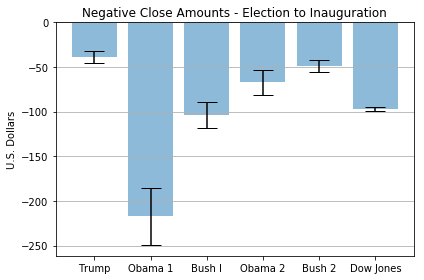

In [56]:
# Create a bar graph with error bars for the negative close days - election to inauguration
who = ['Trump', 'Obama 1', 'Bush l', 'Obama 2', 'Bush 2', 'Dow Jones']
x_pos = np.arange(6)
neg_means = [-39.14, -217.23, -103.45, -66.93, -48.69, -96.77]
neg_error = [6.77, 31.74, 14.68, 13.90, 7.09, 2.20]


# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, neg_means, yerr=neg_error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('U.S. Dollars')
ax.set_xticks(x_pos)
ax.set_xticklabels(who)
ax.set_title('Negative Close Amounts - Election to Inauguration')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()

plt.show()

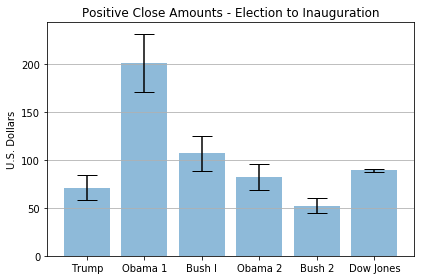

In [58]:
# Create a bar graph with error bars for the positive close days - election to inauguration
who = ['Trump', 'Obama 1', 'Bush l', 'Obama 2', 'Bush 2', 'Dow Jones']
x_pos = np.arange(6)
pos_means = [71.14, 201.50, 106.94, 82.22, 52.21, 89.09]
pos_error = [13.26, 30.46, 18.31, 13.24, 8.00, 1.74]


# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, pos_means, yerr=pos_error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('U.S. Dollars')
ax.set_xticks(x_pos)
ax.set_xticklabels(who)
ax.set_title('Positive Close Amounts - Election to Inauguration')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()

plt.show()

In [61]:
stats.ttest_1samp(-217.23, -96.77) #population.mean())

Ttest_1sampResult(statistic=nan, pvalue=nan)

In [ ]:
# Create bar chart to display positive and negative close days
N = 6
percent_positive_close = (58, 46, 46, 53, 56, 53)

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, percent_positive_close, width, color = 'blue',)

plt.ylabel('Percent')
plt.title('Percent Positive Close Days from Election to Inauguration')
plt.xticks(ind, ('Trump', 'Obama 1', 'Bush 1', 'Obama 2', 'Bush 2', 'DJ 2000-2019'))
plt.yticks(np.arange(0, 60, 5))

#Tried this code but didn't add values
#for i, v in enumerate(percent_positive_close):
    #ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.show()

In [ ]:
# Create tuple of data for plotting  58, 46, 46, 53, 56, 53
summary_tuple = (58, 46, 46, 53, 56, 53)

# Generte the bar graph, using subplots for those with positive vs. negative values.
fig, ax = plt.subplots()
ind = np.arange(len(summary_tuple))
width = 0.5
rects = ax.bar(ind, summary_tuple, width, color='blue')

# Add labels, tick marks, grid.
ax.set_ylabel('Percent')
ax.set_title('Percent Positive Close Days from Election to Inauguration')
ax.set_xticks(ind)
ax.set_xticklabels(('Trump', 'Obama 1', 'Bush 1', 'Obama 2', 'Bush 2', "DJ '00-'19"))
ax.set_autoscaley_on(False)
ax.set_ylim([0,60])
#ax.yaxis.grid(True)

# Use functions to label the percents

def autolabelPercent(rects):
   for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., -8,
               '-%d%% ' % int(height),
               ha='center', va='bottom', color="white")
    
# Call the functions above
autolabelPercent(rects)

# Show the Figure
fig.show()


In [ ]:
# Create new dataframe to hold above values for term data (inauguration to last-day-in-office)
# Data
data = [{
    'Date Range': 'Trump term 1', 'Negative Close':trump_term_negatives, 'Positive Close': trump_term_positives, 'Neutral Close':trump_term_neutrals},
    {'Date Range':'Obama term 1', 'Negative Close':obama_term1_negatives, 'Positive Close': obama_term1_positives, 'Neutral Close':obama_term1_neutrals},
    {'Date Range': 'Bush term 1', 'Negative Close':bush_term1_negatives, 'Positive Close': bush_term1_positives, 'Neutral Close':bush_term1_neutrals},
    {'Date Range': 'Obama term 2', 'Negative Close':obama_term2_negatives, 'Positive Close': obama_term2_positives, 'Neutral Close':obama_term2_neutrals},
    {'Date Range': 'Bush term 2', 'Negative Close':bush_term2_negatives, 'Positive Close': bush_term2_positives, 'Neutral Close':bush_term2_neutrals},
    {'Date Range': 'Overall 2000-2019', 'Negative Close':negatives, 'Positive Close': positives, 'Neutral Close':neutrals}
] 

# Make the DataFrame
terms_df = pd.DataFrame(data) 

# Add calculated column: Percent Positive
terms_df['Percent Positive'] = terms_df['Positive Close']/(terms_df['Negative Close']+terms_df['Neutral Close']+terms_df['Positive Close'])*100

# Print DataFrame. 
terms_df

In [ ]:
# Create 

In [ ]:
# Create new dataframe to hold above values for election to last-day-in-office by term
# Data
data = [{
    'Date Range': 'Trump election through term 1', 'Negative Close':trump_term_negatives, 'Positive Close': trump_term_positives, 'Neutral Close':trump_term_neutrals},
    {'Date Range':'Obama election through term 1', 'Negative Close':obama_term1_negatives, 'Positive Close': obama_term1_positives, 'Neutral Close':obama_term1_neutrals},
    {'Date Range': 'Bush election through term 1', 'Negative Close':bush_term1_negatives, 'Positive Close': bush_term1_positives, 'Neutral Close':bush_term1_neutrals},
    {'Date Range': 'Obama re-election through term 2', 'Negative Close':obama_term2_negatives, 'Positive Close': obama_term2_positives, 'Neutral Close':obama_term2_neutrals},
    {'Date Range': 'Bush re-election through term 2', 'Negative Close':bush_term2_negatives, 'Positive Close': bush_term2_positives, 'Neutral Close':bush_term2_neutrals},
    {'Date Range': 'Overall 2000-2019', 'Negative Close':negatives, 'Positive Close': positives, 'Neutral Close':neutrals}
] 

# Make the DataFrame
terms_with_election_df = pd.DataFrame(data) 

# Print DataFrame. 
terms_with_election_df